### Import Libraries: ###

In [2]:
# imports necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import nltk
#nltk.download('punkt_tab') # RUN WITH THIS ONCE
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
import re
from imblearn.over_sampling import RandomOverSampler
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import BernoulliNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

### Setting up the Dataframe: ###

In [7]:
# imports csv data to pandas dataframe
data = pd.read_csv('Data.csv', index_col=0)

# removes NAN values from dataframe
data.dropna(inplace=True)

### Clean Data: ###

In [8]:
# function used to remove unwanted patterns (url, punctuation, etc)
def rPatterns(text):
    # removes URLs
    text = re.sub(r'http[s]?://\S+', '', text)

    # removes mark-down links
    text = re.sub(r'\[.*?\]\(.*?\)', '', text)

    # removes handles
    text = re.sub(r'@\w+', '', text)

    # removes punctuation
    text = re.sub(r'[^\w\s]', '', text)
    return text.strip()

# used for stemming words
def stem_words(words):
    return ' '.join(stemmer.stem(str(word)) for word in words)

# main code used for cleaning up csv:
# adds columns for number of sentences and characters
data['num_of_chars'] = data['statement'].str.len()
data['num_of_sents'] = data['statement'].apply(lambda x: len(nltk.sent_tokenize(x)))

# changes everything to lowercase
data['lc_statement'] = data['statement'].str.lower()

# removes unwanted text (punctuation, urls, etc.)
data['lc_statement'] = data['lc_statement'].apply(rPatterns)

# performs tokenization (split sentences into list of words)
data['tokens'] = data['lc_statement'].apply(word_tokenize)

# performs stemming (reduce words to their base/root form)
stemmer = PorterStemmer()
data['tokens_stemmed'] = data['tokens'].apply(stem_words)

print(data.head())


                                           statement   status  num_of_chars  \
0                                         oh my gosh  Anxiety            10   
1  trouble sleeping, confused mind, restless hear...  Anxiety            64   
2  All wrong, back off dear, forward doubt. Stay ...  Anxiety            78   
3  I've shifted my focus to something else but I'...  Anxiety            61   
4  I'm restless and restless, it's been a month n...  Anxiety            72   

   num_of_sents                                       lc_statement  \
0             1                                         oh my gosh   
1             2  trouble sleeping confused mind restless heart ...   
2             2  all wrong back off dear forward doubt stay in ...   
3             1  ive shifted my focus to something else but im ...   
4             2  im restless and restless its been a month now ...   

                                              tokens  \
0                                     [oh, my, g

### Prepare data for machine learning models: ###

In [9]:
# separate features and labels
X = data['tokens_stemmed']
y = data['status']

# label encoding target variable
l_enc = LabelEncoder()
y = l_enc.fit_transform(y.values)

# split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

# convert text to features using TF-IDF
vect = TfidfVectorizer(ngram_range=(1,2), max_features=50000)
X_train_vect = vect.fit_transform(X_train)
X_test_vect = vect.transform(X_test)

# resample
ros = RandomOverSampler(random_state=101)
X_train_resampled, y_train_resampled = ros.fit_resample(X_train_vect, y_train)

### Train, Predict, and Score: ###


For Bernoulli
Accuracy: 0.6405997912119199
                      precision    recall  f1-score   support

             Anxiety       0.67      0.60      0.63       768
             Bipolar       0.70      0.58      0.64       566
          Depression       0.66      0.48      0.55      3050
              Normal       0.67      0.93      0.78      3237
Personality disorder       0.87      0.33      0.48       202
              Stress       0.42      0.52      0.47       530
            Suicidal       0.59      0.53      0.56      2184

            accuracy                           0.64     10537
           macro avg       0.65      0.57      0.59     10537
        weighted avg       0.64      0.64      0.63     10537



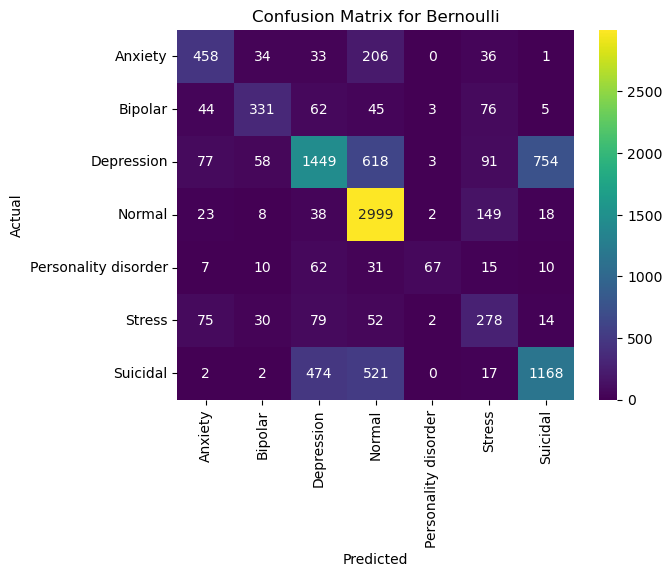


For DecTree
Accuracy: 0.6022587074119768
                      precision    recall  f1-score   support

             Anxiety       0.65      0.57      0.60       768
             Bipolar       0.76      0.51      0.61       566
          Depression       0.78      0.46      0.58      3050
              Normal       0.84      0.75      0.79      3237
Personality disorder       0.38      0.53      0.45       202
              Stress       0.16      0.66      0.26       530
            Suicidal       0.56      0.60      0.58      2184

            accuracy                           0.60     10537
           macro avg       0.59      0.58      0.55     10537
        weighted avg       0.70      0.60      0.63     10537



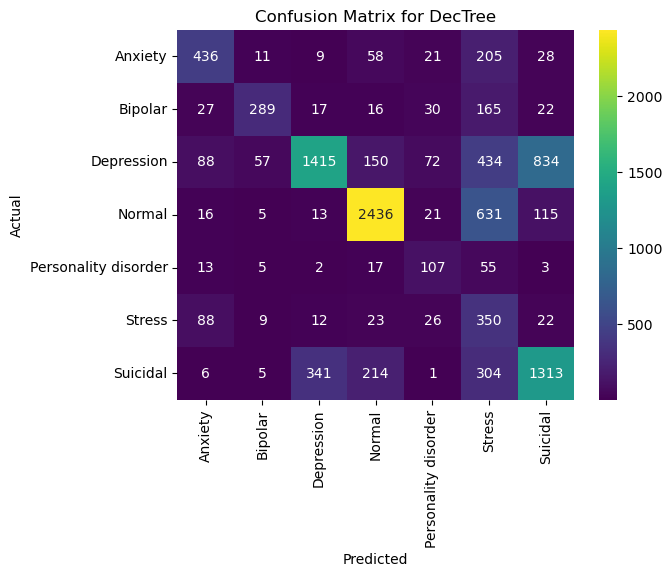


For LogReg
Accuracy: 0.7595140931954066
                      precision    recall  f1-score   support

             Anxiety       0.78      0.82      0.80       768
             Bipolar       0.82      0.80      0.81       566
          Depression       0.71      0.66      0.69      3050
              Normal       0.90      0.92      0.91      3237
Personality disorder       0.70      0.64      0.67       202
              Stress       0.57      0.58      0.58       530
            Suicidal       0.65      0.68      0.66      2184

            accuracy                           0.76     10537
           macro avg       0.73      0.73      0.73     10537
        weighted avg       0.76      0.76      0.76     10537



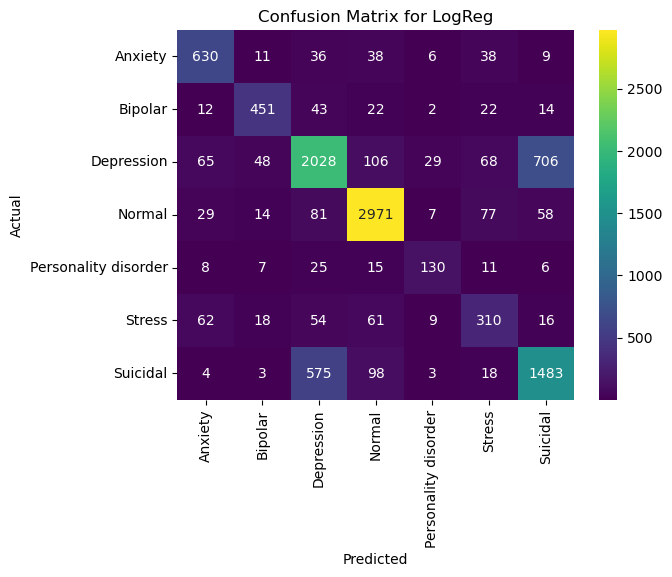


For Forest
Accuracy: 0.7359779823479169
                      precision    recall  f1-score   support

             Anxiety       0.79      0.70      0.74       768
             Bipolar       0.86      0.66      0.75       566
          Depression       0.64      0.72      0.68      3050
              Normal       0.82      0.95      0.88      3237
Personality disorder       0.99      0.43      0.60       202
              Stress       0.79      0.35      0.49       530
            Suicidal       0.68      0.60      0.64      2184

            accuracy                           0.74     10537
           macro avg       0.79      0.63      0.68     10537
        weighted avg       0.74      0.74      0.73     10537



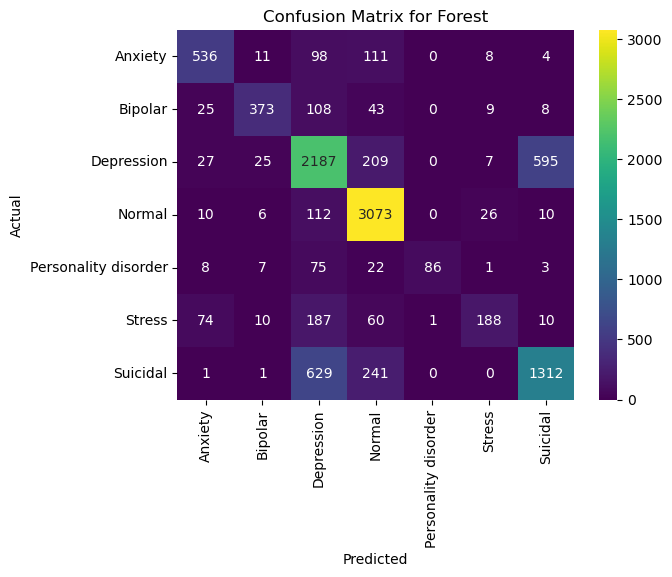

In [5]:
# defines classifiers and stores them in a dictionary
classifiers = {
    'Bernoulli' : BernoulliNB(alpha=0.1, binarize=0.0),
    'DecTree' : DecisionTreeClassifier(max_depth=9, min_samples_split=5, random_state=101),
    'LogReg' : LogisticRegression(solver='liblinear', penalty='l1', C=10, random_state=101),
    'Forest' : RandomForestClassifier(n_estimators = 100)  
}

# holds accuracy scores in case we want them for comparisons
accuracy_scores = []

# trains, tests, and evalutates for all classifiers
for name, clf, in classifiers.items():
    clf.fit(X_train_resampled, y_train_resampled)
    y_pred = clf.predict(X_test_vect)
    accuracy = accuracy_score(y_test, y_pred)

    # prints accuracy score and classification report
    print('')
    print(f"For {name}")
    print(f"Accuracy: {accuracy}")

    # creates confusion matrix and classification report
    labels = l_enc.classes_
    conf_matrix = confusion_matrix(y_test, y_pred)
    print(classification_report(y_test, y_pred, target_names=labels))

    # prints confusion matrix
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='viridis', xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(f'Confusion Matrix for {name}')
    plt.show()

    # adds accuracy score to list
    accuracy_scores.append(accuracy)


Doing just LogisticRegression model:

In [10]:
model = LogisticRegression(solver='liblinear', penalty='l1', C=10, random_state=101)
model.fit(X_train_resampled, y_train_resampled)
y_pred = model.predict(X_test_vect)
print(accuracy_score(y_test, y_pred))

0.7595140931954066


Reading in and Creating New Dataset

In [6]:
new_df = pd.DataFrame()
with open('new_28_train.jsonl', mode='r', encoding='utf-8') as inf:
    new_df = pd.read_json(inf, lines=True)

#print(new_df.head())
txt_vals = new_df['text'].values

new_ys = new_df['warnings_coarse_open'].values
print(new_ys[0])

full_df = pd.DataFrame()
full_df['text'] = txt_vals

dis = []
agg = []
ab = []
preg = []
med = []
mh = []
sc = []
for i in new_ys:
    if "discrimination" in i:
        dis.append(1)
    else:
        dis.append(0)
    if "aggression" in i:
        agg.append(1)
    else:
        agg.append(0)
    if "abuse" in i:
        ab.append(1)
    else:
        ab.append(0)
    if "pregnancy" in i:
        preg.append(1)
    else:
        preg.append(0)
    if "medical" in i:
        med.append(1)
    else:
        med.append(0)
    if "mental-health" in i:
        mh.append(1)
    else:
        mh.append(0)
    if "sexual-content" in i:
        sc.append(1)
    else:
        sc.append(0)

full_df['discrimination'] = dis
full_df['aggresion'] = agg
full_df['abuse'] = ab
full_df['pregnancy'] = preg
full_df['medical'] = med
full_df['mental-health'] = mh
full_df['sexual-content'] = sc

print(full_df.head())
        

['sexual-content', 'discrimination']
                                                text  discrimination  \
0  [<div class="userstuff"><p>Dean isn’t sure how...               1   
1  [<div class="userstuff"><p><em> I’ve put the p...               0   
2  [<div class="userstuff module" role="article">...               1   
3  [<div class="userstuff"><p>Matt settled in the...               0   
4  [<div class="userstuff module" role="article">...               1   

   aggresion  abuse  pregnancy  medical  mental-health  sexual-content  
0          0      0          0        0              0               1  
1          0      1          0        0              0               1  
2          1      1          0        0              1               0  
3          0      0          0        0              1               0  
4          1      1          0        1              1               0  


In [ ]:
# changes everything to lowercase
new_df['cleaned_text'] = new_df['text'].to_string().lower()
#print(new_df.head())

# removes unwanted text (punctuation, urls, etc.)
new_df['cleaned_text'] = new_df['cleaned_text'].apply(rPatterns)

# performs tokenization (split sentences into list of words)
new_df['cleaned_text'] = new_df['cleaned_text'].apply(word_tokenize)

# performs stemming (reduce words to their base/root form)
stemmer = PorterStemmer()
new_df['cleaned_text'] = new_df['cleaned_text'].apply(stem_words)

In [16]:
print(new_df.head())

    work_id                               warnings_coarse_open  \
0  23756089                   [sexual-content, discrimination]   
1  23758960                            [sexual-content, abuse]   
2  23777605  [abuse, aggression, mental-health, discriminat...   
3  23775427                                    [mental-health]   
4  23760148  [aggression, abuse, mental-health, medical, di...   

                                                text  \
0  [<div class="userstuff"><p>Dean isn’t sure how...   
1  [<div class="userstuff"><p><em> I’ve put the p...   
2  [<div class="userstuff module" role="article">...   
3  [<div class="userstuff"><p>Matt settled in the...   
4  [<div class="userstuff module" role="article">...   

                                        cleaned_text  
0  0 div classuserstuffpdean isnt sure how 1 div ...  
1  0 div classuserstuffpdean isnt sure how 1 div ...  
2  0 div classuserstuffpdean isnt sure how 1 div ...  
3  0 div classuserstuffpdean isnt sure how 1 d

Saving models as pickle files for usage in other files:

In [ ]:
import pickle

with open('model_pkl', 'wb') as files:
    pickle.dump(model, files)

with open('tfidf_pkl', 'wb') as file:
    pickle.dump(vect, file)

with open('labels_pkl', 'wb') as file:
    pickle.dump(l_enc, file)
